### House Price Prediction

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Read Data from CSV File
df = pd.read_csv("HousePricePrediction.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [36]:
df.shape

(14620, 23)

In [37]:
#The information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [38]:
#Description about the data frame (count, mean & standard deviation)
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [39]:
#Finding the correlation btw the columns of dataframe
df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045966,-0.329034,-0.516909,-0.648127,-0.100269,-0.312305,-0.112937,-0.293004,-0.045061,...,-0.068645,-0.109155,0.294709,-0.479334,-0.070841,-0.599900,-0.089604,-0.004821,-0.004542,-0.773114
Date,0.045966,1.000000,-0.015663,-0.026485,-0.021958,0.004392,-0.010335,0.012006,-0.004782,-0.027402,...,-0.005869,-0.011636,0.018243,-0.023327,-0.018231,-0.032495,-0.000050,-0.004071,0.011457,-0.027919
number of bedrooms,-0.329034,-0.015663,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,-0.516909,-0.026485,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,-0.648127,-0.021958,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,-0.100269,0.004392,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,-0.312305,-0.010335,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.112937,0.012006,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,...,-0.024226,0.085865,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,-0.293004,-0.004782,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,...,-0.055357,0.102944,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,-0.045061,-0.027402,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,...,-0.381718,-0.062126,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376


<AxesSubplot:>

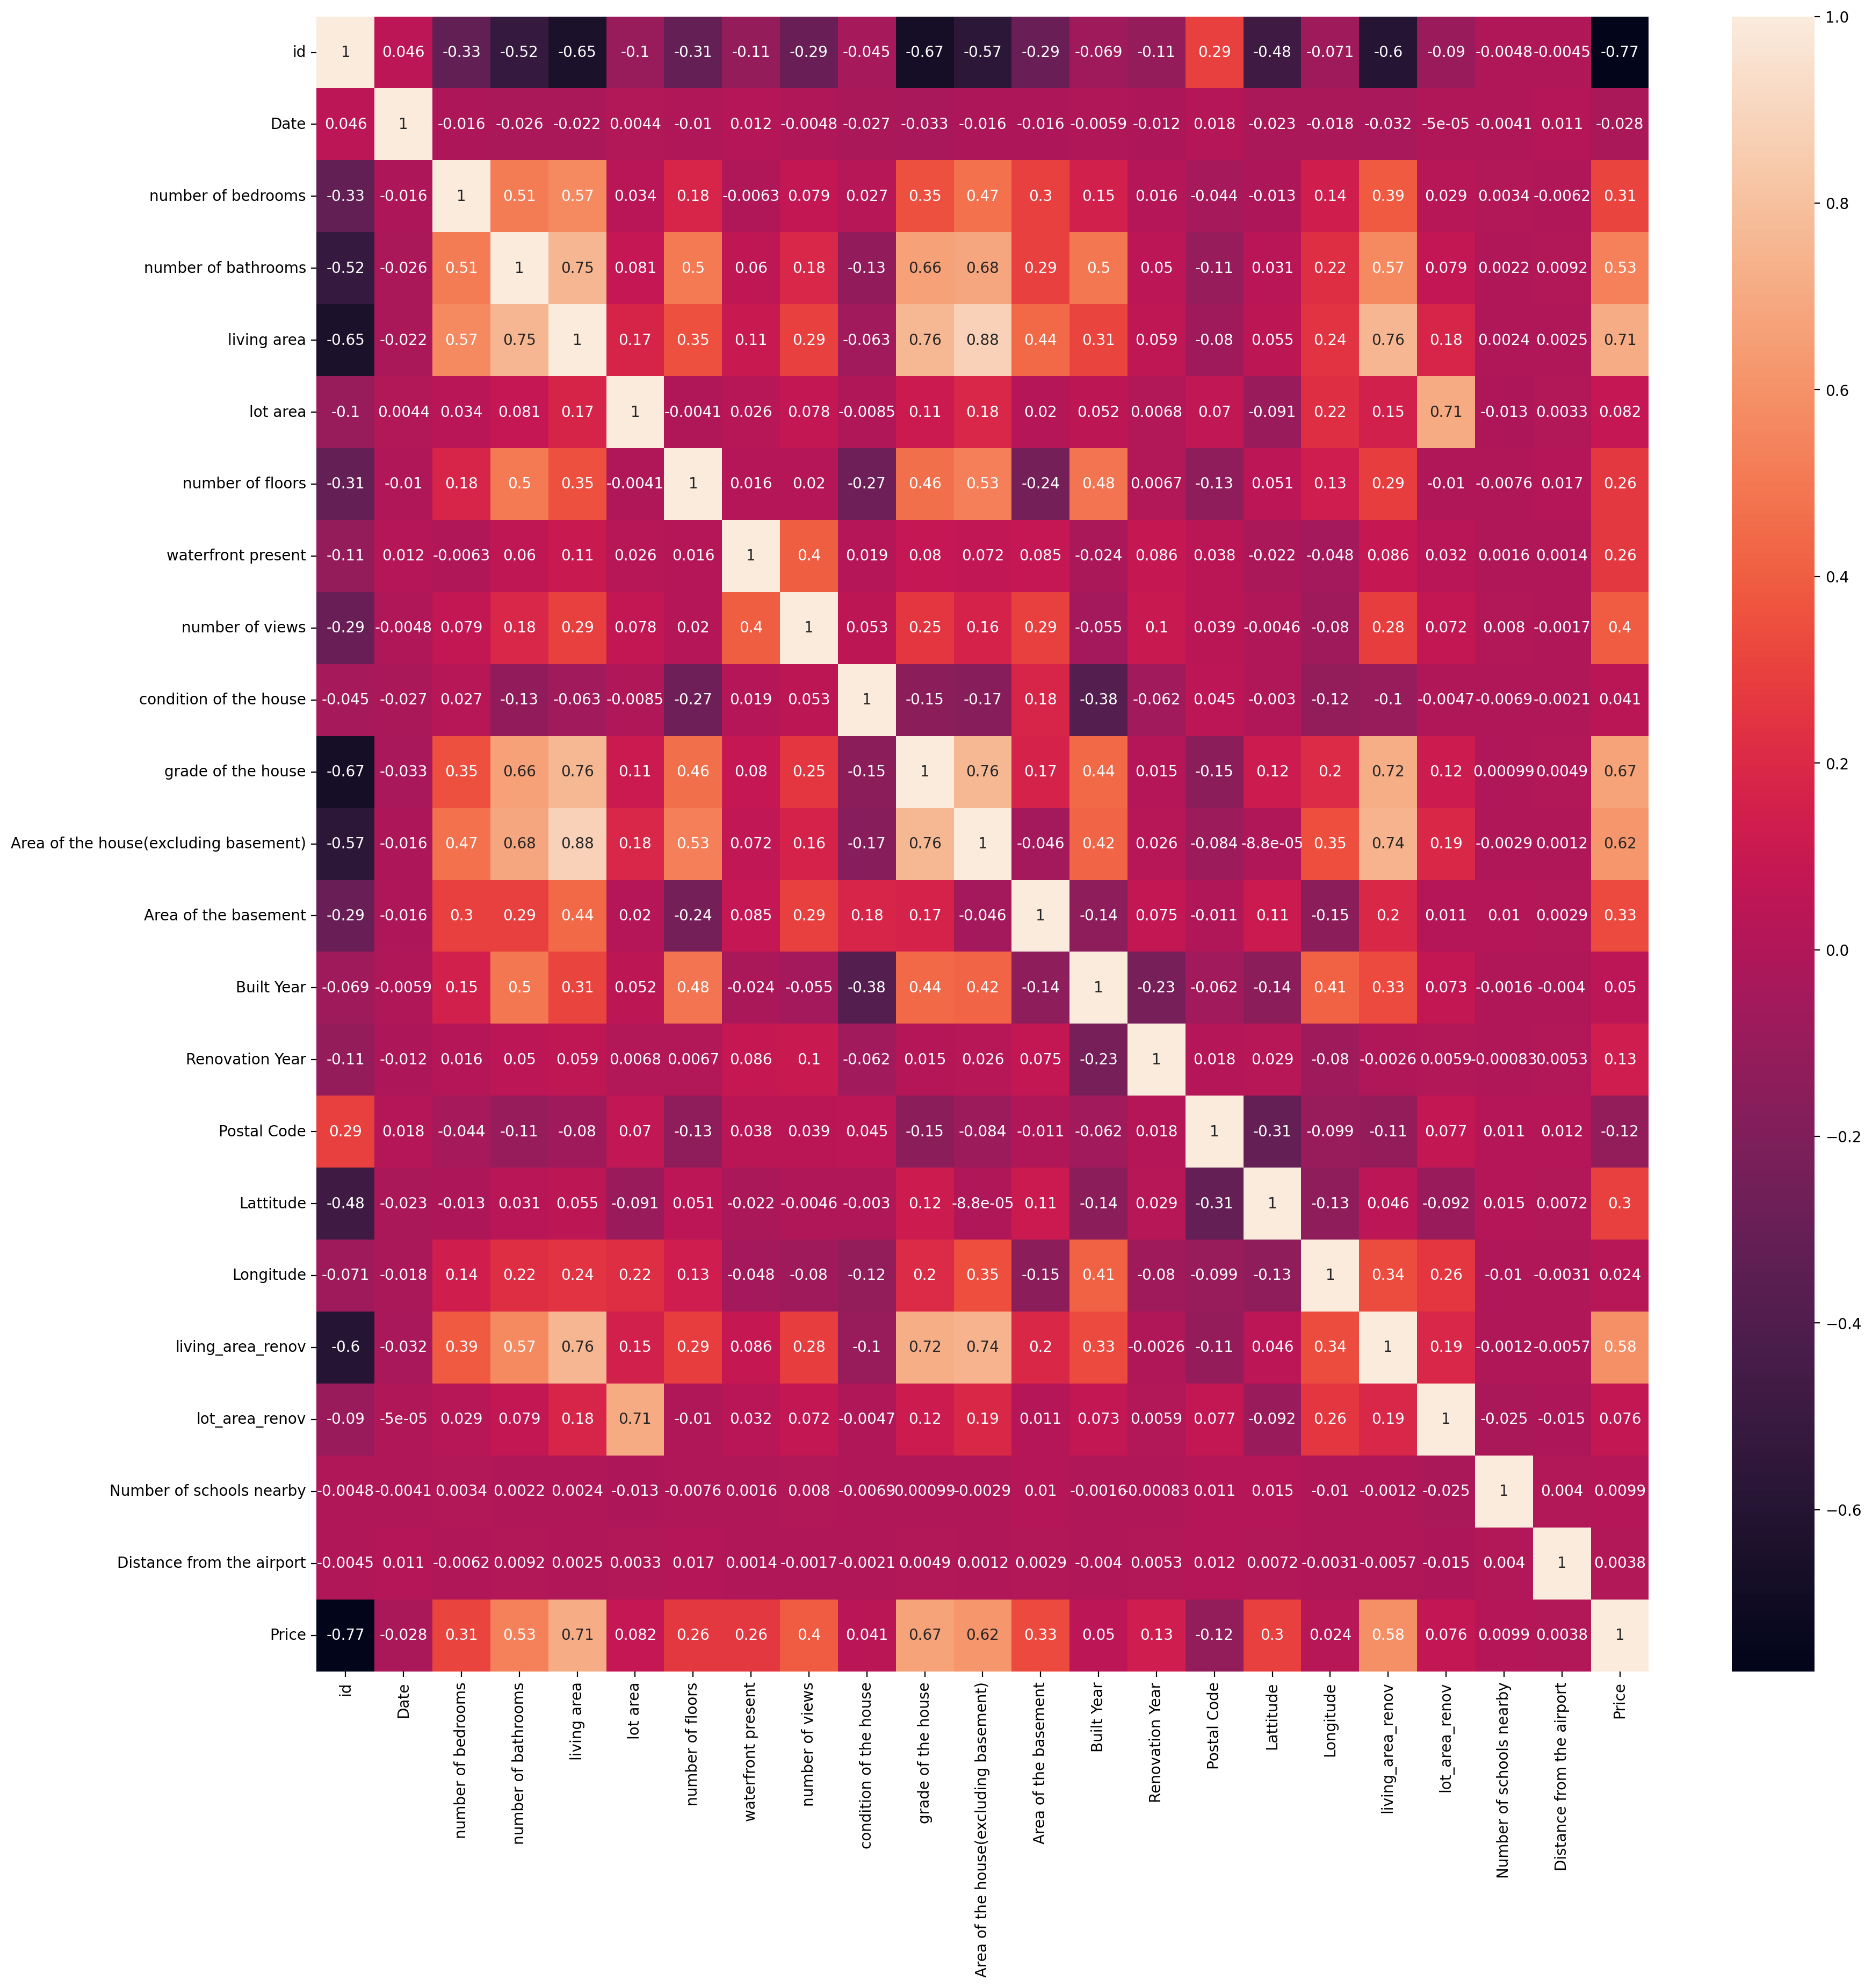

In [40]:
#Visualize the correlation using a heat map
plt.figure(figsize=(20,20), dpi=200)
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='number of bedrooms', ylabel='count'>

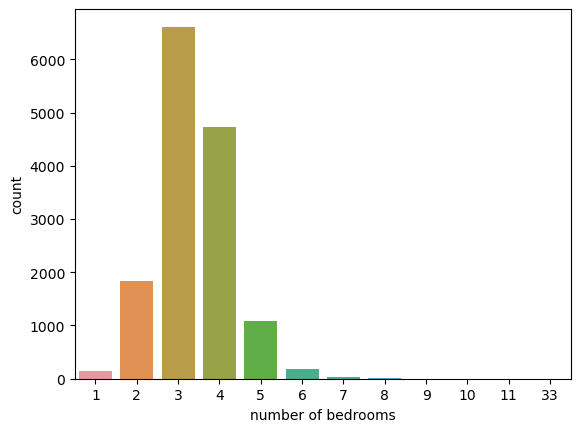

In [41]:
#Visualizing Number of Bedrooms
sns.countplot(data=df, x='number of bedrooms')

<AxesSubplot:xlabel='living area', ylabel='Price'>

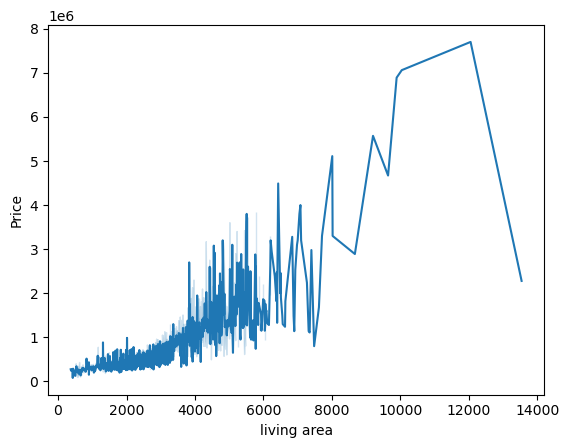

In [42]:
sns.lineplot(x=df['living area'], y=df['Price'])

In [43]:
#Data Preprocessing

In [44]:
#Checking the null values
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [45]:
df['number of bathrooms']

0        2.50
1        2.50
2        2.75
3        2.50
4        2.00
         ... 
14615    1.50
14616    2.00
14617    1.00
14618    1.00
14619    1.00
Name: number of bathrooms, Length: 14620, dtype: float64

In [46]:
df.rename(columns = {'number of bathrooms' : 'no_of_bathrooms'}, inplace = True)
df.no_of_bathrooms = df.no_of_bathrooms.round()
df['no_of_bathrooms']

0        2.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
14615    2.0
14616    2.0
14617    1.0
14618    1.0
14619    1.0
Name: no_of_bathrooms, Length: 14620, dtype: float64

In [47]:
df['number of floors']

0        2.0
1        1.5
2        1.5
3        2.0
4        1.5
        ... 
14615    1.0
14616    1.5
14617    1.0
14618    1.0
14619    1.0
Name: number of floors, Length: 14620, dtype: float64

In [48]:
df.rename(columns = {'number of floors' : 'no_of_floors'}, inplace = True)
df.no_of_floors = df.no_of_floors.round()
df['no_of_floors']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
14615    1.0
14616    2.0
14617    1.0
14618    1.0
14619    1.0
Name: no_of_floors, Length: 14620, dtype: float64

In [49]:
#Dropping the irrelated columns id and Date
df.drop(['id', 'Date'], axis = 1, inplace=True)
df

,number of bedrooms,no_of_bathrooms,living area,lot area,no_of_floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.0,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.0,2920,4000,2.0,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,3.0,2910,9480,2.0,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.0,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.0,2710,4500,2.0,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,2.0,1556,20000,1.0,0,0,4,7,1556,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,3,2.0,1680,7000,2.0,0,0,4,7,1680,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,2,1.0,1070,6120,1.0,0,0,3,6,1070,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,4,1.0,1030,6621,1.0,0,0,4,6,1030,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [50]:
#Labelling X and y Values
X = df.drop('Price', axis = 1)
y = df['Price']

In [51]:
#Splitting of Dataset to train and test
from sklearn.model_selection import train_test_split

In [52]:
#Splitting data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [53]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([373869.87801419, 631757.95663355, 455547.13095555, ...,
       901160.30772896, 299116.67004451, 531514.494077  ])

In [57]:
#Evaluating model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

198544.90673194468

In [59]:
#Mean Absolute Error
mae = mean_absolute_error(y_pred, y_test)
mae

124749.4504929261

In [60]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators = 250, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [62]:
y_pred = rf.predict(X_test)

In [63]:
y_pred

array([ 292486.704,  619181.348,  580876.66 , ..., 1115277.588,
        278457.564,  622945.736])

In [64]:
#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

133205.50383458412

In [65]:
#Mean Absolute Error
mae = mean_absolute_error(y_pred, y_test)
mae

68319.0128372093